In [20]:
from DLtools.Data import instant_data,station_sel
from DLtools.feature_sel import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Loading Data 

In [21]:
###### SETTING AREA ################
loading = instant_data()
# df,mode = loading.hourly_instant(),'hour'
df,mode = loading.daily_instant(),'day'
if mode =='hour': n_past,n_future = 24*7,72
elif mode =='day': n_past,n_future = 60,30

st = 'CPY012'
target,start_p,stop_p,host_path=station_sel(st,mode)

save_path = host_path

<AxesSubplot:xlabel='date'>

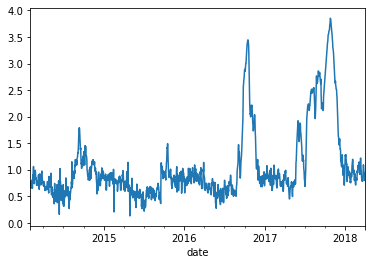

In [22]:
df = df[start_p:stop_p]
data = df

data['Day'] = data.index.dayofyear #add day
data = data.interpolate(limit=300000000,limit_direction='both').astype('float32')#interpolate neighbor first, for rest NA fill with mean() #.apply(lambda x: x.fillna(x.mean()),axis=0)
data[target].plot()


In [23]:
data = call_mar(data,target,mode,cutoff=0.2)

# Check Corr

<AxesSubplot:>

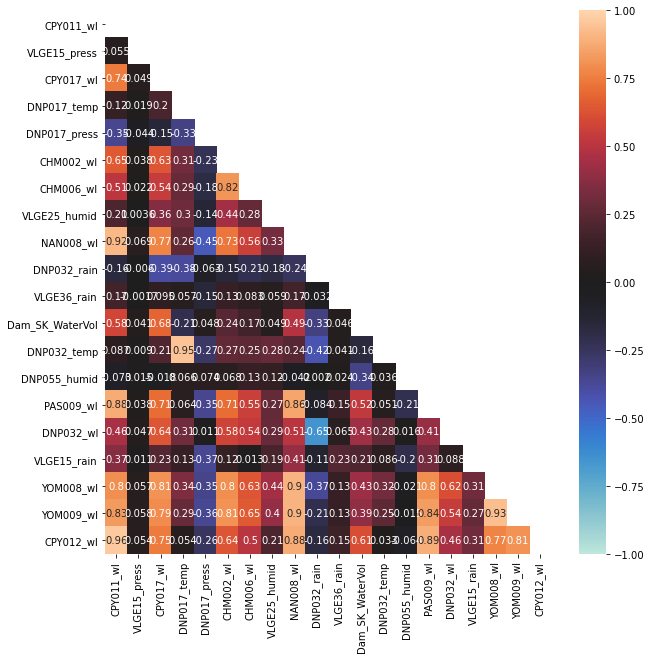

In [24]:
plt.subplots(figsize=(10,10))
mask = np.triu(data.corr())
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0,mask=mask)

# PCA analysis

In [26]:
# x = data.drop([target],axis=1)
x = scale(data)
covar_matrix = PCA(n_components = x.shape[1])
covar_matrix.fit(x.T)

PCA(n_components=20)

In [27]:
PC_transform = covar_matrix.transform(x.T)
####################
pc_col = []
for i in range (PC_transform.shape[1]):
  pc_col.append('component_'+str(i+1))
#########################
principalDf = pd.DataFrame(data = PC_transform, columns = pc_col)

finalDf = pd.concat([principalDf, pd.Series(data.columns.T)],axis=1)
finalDf.set_index(0).to_csv('MAR/pca_day.csv')
finalDf.set_index(0)

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15,component_16,component_17,component_18,component_19,component_20
0,,,,,,,,,,,,,,,,,,,,
CPY011_wl,-17.962105,-9.174849,-4.517444,-0.374311,0.898321,2.461117,-0.965179,7.372972,-1.853444,-3.268887,0.937178,-5.872401,-0.739543,-4.942266,0.765039,-0.188684,-0.989040,-1.161496,4.428896,3.695488e-06
VLGE15_press,19.196733,-5.829326,-0.336868,6.670040,30.063980,12.867345,8.984844,-8.956455,-0.512765,-1.622343,-1.303909,-0.073048,-0.087176,-0.107270,0.543561,-0.000077,0.024289,-0.017055,0.030908,-5.066395e-07
CPY017_wl,-15.057741,-1.881808,9.853920,2.501843,-0.639148,-1.397623,2.573860,2.984662,-5.985136,6.574694,-3.892069,9.220585,-4.926947,-0.524715,6.389153,1.192980,-1.641757,0.405137,0.088727,3.948808e-06
DNP017_temp,9.851589,31.504242,-5.975263,6.720382,4.043267,-2.379262,-8.394630,5.517994,-1.824563,0.451025,1.307509,-1.097996,-0.210549,-1.166472,0.424440,-3.557012,-0.998303,4.259167,0.148720,-1.907349e-06
DNP017_press,33.144783,-13.136509,27.950521,2.406989,-4.093219,-8.388206,-7.530608,1.014696,3.057961,-11.532771,-3.048634,1.193956,-0.414692,-0.721070,-0.153945,0.528952,-0.213291,0.610552,0.204983,-1.034141e-05
CHM002_wl,-10.647934,5.154740,0.796738,-14.657651,-0.625715,-0.946557,-3.833893,-8.903845,5.607036,-0.570551,0.086075,0.905615,9.520749,-0.374475,5.759813,0.105369,0.546058,0.092781,0.147586,3.650784e-06
CHM006_wl,-6.033270,6.817933,4.859957,-16.494755,-0.409736,4.255095,-7.542510,-7.715072,11.759192,7.348101,-8.889419,-3.834414,-4.232375,-1.253598,-3.113307,0.145520,-0.339981,-0.050692,-0.197219,1.654029e-06
VLGE25_humid,6.187404,10.309999,-1.109602,-2.757064,-6.231042,-18.496002,17.838024,-14.594455,-8.690048,0.274227,-0.344522,-4.962753,-1.212148,-1.054674,-0.521691,0.164926,0.065532,0.023636,0.085506,1.966953e-06
NAN008_wl,-18.784805,-1.623001,-6.437849,-0.876981,1.112870,1.741948,1.946919,4.477610,-1.284142,-3.356756,1.004376,0.535861,1.880164,-2.255838,-3.505386,6.183007,-1.068745,2.881006,-1.397689,4.947186e-06


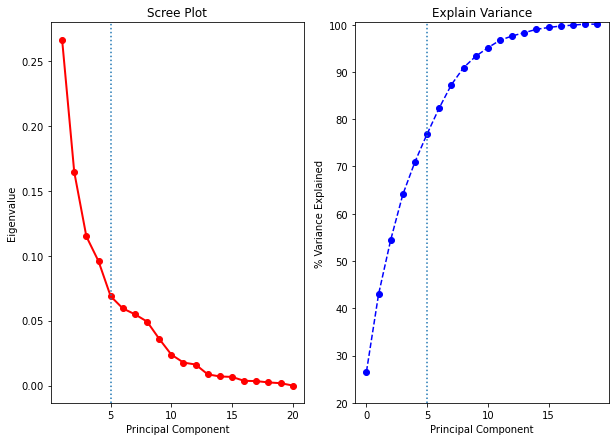

In [28]:
fig,ax = plt.subplots(1,2, figsize=(10,7))
##########################################
PC_values = np.arange(covar_matrix.n_components_) + 1
ax[0].plot(PC_values, covar_matrix.explained_variance_ratio_, 'ro-', linewidth=2)
ax[0].set_title('Scree Plot')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Eigenvalue')


########################################
variance = covar_matrix.explained_variance_ratio_
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
ax[1].set_ylabel('% Variance Explained')
ax[1].set_xlabel('Principal Component')
ax[1].set_title('Explain Variance')
ax[1].set_ylim(20,100.5)
ax[1].plot(var,'--bo')

#####################################
ax[0].axvline(5,linestyle=':')
ax[1].axvline(5,linestyle=':')
plt.savefig('MAR/PCA_analysis_excludeTarget_day.png', dpi=300, bbox_inches='tight')

In [38]:
pca = PCA(n_components = 5 )

split_date = '2017-01-01'
train,test = data[:split_date],data[split_date:]

pca.fit(data)
train_pca = pca.transform(train).astype('float32')
test_pca = pca.transform(test)

In [42]:
pd.DataFrame(train_pca,index=train.index)
pd.DataFrame(test_pca,index=test.index)

,0,1,2,3,4
date,,,,,
2017-01-01,-2848.581055,1999.349121,4.762773,20.375992,6.299751
2017-01-02,-2816.038330,1981.341187,4.398861,20.418476,6.691669
2017-01-03,-2783.496826,1963.334351,4.186635,20.421680,6.880840
2017-01-04,-2750.954346,1945.286011,10.197193,19.738398,6.940584
2017-01-05,-2718.412598,1927.324341,4.567285,20.186350,6.055453
...,...,...,...,...,...
2018-03-27,-10943.541992,749.725830,-5.313711,-4.360237,-24.767855
2018-03-28,-10945.423828,728.748047,-5.219244,0.420449,-21.585796
2018-03-29,-10945.843750,711.643188,-8.264971,-26.137102,-18.954653
